#**Import Library**

In [ ]:
import pandas as pd                 # import file
import numpy as np                  # analisis dan perhitungan data
import matplotlib.pyplot as plt     # tampilan grafik
import seaborn as sns               # tampilan grafik
import random                       # mengambil nilai secara acak
from scipy.spatial.distance import cdist # menghitung jarak sendiri

#**Eksplorasi dan Persiapan Data**

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1WPrh8yWkUE5Lf9h_j_Utu4AS-uRaM1PT/edit?usp=sharing&ouid=112877982210070536330&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df_train = pd.read_excel(path)

Summarize the Dataset

In [ ]:
df_train

,KECAMATAN,DESA,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,...,R1208a1,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2
0,ARJASARI,ANCOLMEKAR,2821.0,2723.0,1731.0,1731.00,0.0,0.0,Dalam lubang atau dibakar,Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
1,ARJASARI,PATROLSARI,4321.0,4796.0,2971.0,2971.00,0.0,0.0,Dalam lubang atau dibakar,Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
2,BALEENDAH,BOJONGMALAKA,12928.0,12559.0,7501.0,7501.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
3,BANJARAN,KAMASAN,4531.0,4087.0,2514.0,2514.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,3.0,0.0,0.0,Tidak ada,Tidak ada,Ada,Ada,Ada,Tidak ada,2.0
4,BANJARAN,MEKARJAYA,3998.0,3719.0,2457.0,2457.00,0.0,0.0,Dalam lubang atau dibakar,Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,3.0
5,CANGKUANG,BANDASARI,4958.0,4806.0,3033.0,2356.00,677.0,0.0,"sampah, kemudian diangkut",Jamban umum,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
6,CICALENGKA,CICALENGKA WETAN,7362.0,7372.0,4677.0,4677.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,1.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,4.0
7,CILENGKRANG,JATIEENDAH,10993.0,10487.0,5653.0,5014.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
8,CILEUNYI,CIMEKAR,19307.0,18782.0,11368.0,11368.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,2.0,2.0,1.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,1.0
9,CIMENYAN,MEKARSALUYU,2125.0,2038.0,1370.0,1370.00,0.0,0.0,"sampah, kemudian diangkut",Jamban sendiri,...,0.0,0.0,0.0,Tidak ada,Ada,Ada,Tidak ada,Tidak ada,Tidak ada,5.0


In [ ]:
df_train.shape

(28, 179)

In [ ]:
df_train.describe()

,R401a,R401b,R401c,R501a1,R501a2,R501b,R601a2,R601b2,R601c2,R601d2,...,R1206b1,R1206c1,R1206e11,R1206g1,R1206i1,R1206j1,R1208a1,R1208b1,R1208c1,R1404a2
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6264.750000,6073.821429,3759.500000,3405.833214,43.035714,6.750000,0.392857,0.428571,0.107143,0.321429,...,0.071429,0.228571,79.075000,20.964286,0.214286,0.214286,0.357143,0.178571,0.107143,1.607143
std,3810.262367,3714.755194,2197.997346,2273.618471,159.310431,35.717643,0.785955,0.790151,0.416270,1.055973,...,0.262265,0.696476,85.732152,38.429813,0.568112,0.629941,0.780042,0.475595,0.314970,1.100144
min,2125.000000,2038.000000,1370.000000,5.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3825.750000,3723.500000,2427.750000,1956.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5032.500000,4801.000000,3006.500000,2575.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,49.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7878.000000,7820.750000,4839.250000,4010.250000,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,115.000000,19.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,19307.000000,18782.000000,11368.000000,11368.000000,677.000000,189.000000,3.000000,3.000000,2.000000,4.000000,...,1.000000,3.400000,280.000000,179.000000,2.000000,3.000000,3.000000,2.000000,1.000000,5.000000


Dropping duplicate rows

In [ ]:
duplicate_rows_df = df_train[df_train.duplicated()]
duplicate_rows_df.shape

(0, 179)

Dropping the missing or null values


In [ ]:
df_train.isna()

,KECAMATAN,DESA,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,...,R1208a1,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()

KECAMATAN    0
DESA         0
R401a        0
R401b        0
R401c        0
            ..
R1304e       0
R1308a       0
R1308b       0
R1309        0
R1404a2      0
Length: 179, dtype: int64

In [ ]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

KECAMATAN    0
DESA         0
R401a        0
R401b        0
R401c        0
            ..
R1304e       0
R1308a       0
R1308b       0
R1309        0
R1404a2      0
Length: 179, dtype: int64

Encode Data Kategorikal menjadi Data Numerik

In [ ]:
df_train.replace(['Tidak','Ya'], [0,1], inplace=True)
df_train.replace(['Tidak ada','Ada'], [0,1], inplace=True)
df_train.replace(['Tidak ada Kelompok Fitnes','Ada'], [0,1], inplace=True)
df_train.replace(['Tidak ada','Ada, baik','Ada, rusak sedang','Ada, rusak berat'], [0,1,1,1], inplace=True)
df_train.replace(['Tidak ada','Ada, dikelola','Ada, tidak dikelola'], [0,1,1], inplace=True)
df_train.replace(['Tidak ada angkutan umum','Ada tanpa trayek tetap','Ada, dengan trayek tetap'], [0,1,2], inplace=True)
df_train.replace(['Ada, sebagian kecil warga terlibat','Ada, sebagian besar warga terliba','Ada, sebagian besar warga terlibat'], [1,2,2], inplace=True)
df_train.replace(['Dalam lubang atau dibakar',' sampah, kemudian diangkut'], [4,5], inplace=True)
df_train.replace(['Jamban sendiri','Jamban bersama','Jamban umum'], [3,4,5], inplace=True)
df_train.replace(['Sinyal sangat kuat','Sinyal kuat','Sinyal Kuat','Sinyal lemah'], [5,5,5,3], inplace=True)
df_train.replace(['Tanak','Diperkeras','Aspal beton'], [3,4,5], inplace=True)
df_train.replace(['Tidak dapat dilalui sepanjang tahun','Sepanjang tahun kecuali saat tertentu','Sepanjang tahun'], [3,4,5], inplace=True)
df_train.replace(['4G/LTE'], [5], inplace=True)
df_train.replace(['Digunakan'], [5], inplace=True)
df_train.replace(['Tidak ada','Jarang beroperasi','Beroperasi'], [0,1,1], inplace=True)
df_train.replace(['Air kemasan bermerk','Air isi ulang','Mata air','Mata Air','Sumur','Sumur bor atau pompa','Ledeng tanpa meteran','Ledeng dengan meteran'], [3,3,3,3,4,4,5,5], inplace=True)
df_train

,KECAMATAN,DESA,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,...,R1208a1,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2
0,ARJASARI,ANCOLMEKAR,2821.0,2723.0,1731.0,1731.00,0.0,0.0,4,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
1,ARJASARI,PATROLSARI,4321.0,4796.0,2971.0,2971.00,0.0,0.0,4,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
2,BALEENDAH,BOJONGMALAKA,12928.0,12559.0,7501.0,7501.00,0.0,0.0,5,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
3,BANJARAN,KAMASAN,4531.0,4087.0,2514.0,2514.00,0.0,0.0,5,3,...,3.0,0.0,0.0,0,0,1,1,1,0,2.0
4,BANJARAN,MEKARJAYA,3998.0,3719.0,2457.0,2457.00,0.0,0.0,4,3,...,0.0,0.0,0.0,0,1,1,0,0,0,3.0
5,CANGKUANG,BANDASARI,4958.0,4806.0,3033.0,2356.00,677.0,0.0,5,5,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
6,CICALENGKA,CICALENGKA WETAN,7362.0,7372.0,4677.0,4677.00,0.0,0.0,5,3,...,1.0,0.0,0.0,0,1,1,0,0,0,4.0
7,CILENGKRANG,JATIEENDAH,10993.0,10487.0,5653.0,5014.00,0.0,0.0,5,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
8,CILEUNYI,CIMEKAR,19307.0,18782.0,11368.0,11368.00,0.0,0.0,5,3,...,2.0,2.0,1.0,0,1,1,0,0,0,1.0
9,CIMENYAN,MEKARSALUYU,2125.0,2038.0,1370.0,1370.00,0.0,0.0,5,3,...,0.0,0.0,0.0,0,1,1,0,0,0,5.0


In [ ]:
df_train.drop(df_train.columns[[0,1]], axis=1, inplace=True)
df_train

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208a1,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2
0,2821.0,2723.0,1731.0,1731.00,0.0,0.0,4,3,3,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
1,4321.0,4796.0,2971.0,2971.00,0.0,0.0,4,3,4,4,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
2,12928.0,12559.0,7501.0,7501.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
3,4531.0,4087.0,2514.0,2514.00,0.0,0.0,5,3,3,5,...,3.0,0.0,0.0,0,0,1,1,1,0,2.0
4,3998.0,3719.0,2457.0,2457.00,0.0,0.0,4,3,3,3,...,0.0,0.0,0.0,0,1,1,0,0,0,3.0
5,4958.0,4806.0,3033.0,2356.00,677.0,0.0,5,5,4,4,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
6,7362.0,7372.0,4677.0,4677.00,0.0,0.0,5,3,4,4,...,1.0,0.0,0.0,0,1,1,0,0,0,4.0
7,10993.0,10487.0,5653.0,5014.00,0.0,0.0,5,3,3,3,...,0.0,0.0,0.0,0,1,1,0,0,0,1.0
8,19307.0,18782.0,11368.0,11368.00,0.0,0.0,5,3,4,4,...,2.0,2.0,1.0,0,1,1,0,0,0,1.0
9,2125.0,2038.0,1370.0,1370.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0.0,0,1,1,0,0,0,5.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Columns: 177 entries, R401a to R1404a2
dtypes: float64(107), int64(70)
memory usage: 38.9 KB


Feature scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(df_train)

In [ ]:
cols = df_train.columns

In [ ]:
db = pd.DataFrame(X, columns=[cols])

In [ ]:
db

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208a1,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2
0,0.040508,0.040910,0.036107,0.151872,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
1,0.127808,0.164716,0.160132,0.261001,0.000000,0.0,0.0,0.0,0.5,0.5,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
2,0.628739,0.628344,0.613223,0.659675,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
3,0.140030,0.122372,0.114423,0.220782,0.000000,0.0,1.0,0.0,0.0,1.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.4
4,0.109009,0.100394,0.108722,0.215765,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.6
5,0.164882,0.165313,0.166333,0.206877,1.000000,0.0,1.0,1.0,0.5,0.5,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
6,0.304796,0.318562,0.330766,0.411142,0.000000,0.0,1.0,0.0,0.5,0.5,...,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8
7,0.516122,0.504599,0.428386,0.440800,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
8,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,0.5,0.5,...,0.666667,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2
9,0.000000,0.000000,0.000000,0.120101,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#**Pemodelan**

In [ ]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters
        self.max_iterations = 100
        self.plot_figure = True
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        #memilih random untuk dijadikan centroid pertama
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        # membuat clusters berdasarkan centroids yang ada
        clusters = [[] for _ in range(self.K)]

        # lakukan perulangan hingga ke semua point dan cek centroid terdekat
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids

    def predict_cluster(self, clusters, X):
        y_predictions = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_predictions[sample_idx] = cluster_idx

        return y_predictions

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                print("Termination criterion satisfied")
                break

        # kembalikan label predictions
        y_predictions = self.predict_cluster(clusters, X)

        if self.plot_figure:
            self.plot_fig(X, y_predictions)

        return y_predictions

Clustering dilakukan dengan menggunakan algoritma K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
dbs = db.iloc[:, 0:177].values

y_kmeans = kmeans.fit_predict(dbs)
y_kmeans

array([1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1], dtype=int32)

In [ ]:
df_train['cluster'] = y_kmeans
df_train

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2,cluster
0,2821.0,2723.0,1731.0,1731.00,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1
1,4321.0,4796.0,2971.0,2971.00,0.0,0.0,4,3,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
2,12928.0,12559.0,7501.0,7501.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0,1,1,0,0,0,1.0,0
3,4531.0,4087.0,2514.0,2514.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0,0,1,1,1,0,2.0,2
4,3998.0,3719.0,2457.0,2457.00,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,3.0,1
5,4958.0,4806.0,3033.0,2356.00,677.0,0.0,5,5,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
6,7362.0,7372.0,4677.0,4677.00,0.0,0.0,5,3,4,4,...,0.0,0.0,0,1,1,0,0,0,4.0,2
7,10993.0,10487.0,5653.0,5014.00,0.0,0.0,5,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1
8,19307.0,18782.0,11368.0,11368.00,0.0,0.0,5,3,4,4,...,2.0,1.0,0,1,1,0,0,0,1.0,0
9,2125.0,2038.0,1370.0,1370.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0,1,1,0,0,0,5.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

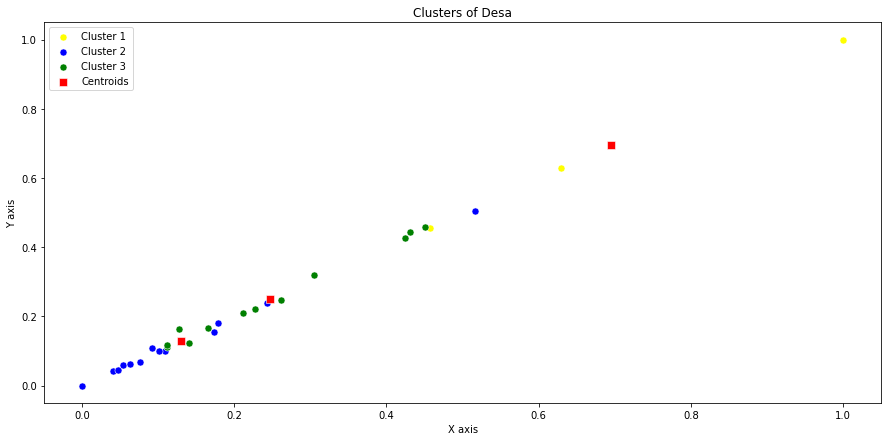

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=50,marker=',')
plt.grid(False)
plt.title('Clusters of Desa')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

In [ ]:
df1 = df_train[df_train.cluster==0]
df2 = df_train[df_train.cluster==1]
df3 = df_train[df_train.cluster==2]

In [ ]:
df1.to_csv('cluster0.csv', index=False, header=False)
df1

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2,cluster
2,12928.0,12559.0,7501.0,7501.0,0.0,0.0,5,3,3,5,...,0.0,0.0,0,1,1,0,0,0,1.0,0
8,19307.0,18782.0,11368.0,11368.0,0.0,0.0,5,3,4,4,...,2.0,1.0,0,1,1,0,0,0,1.0,0
13,9988.0,9669.0,6125.0,6125.0,0.0,0.0,5,3,3,4,...,1.0,0.0,0,1,1,0,0,0,1.0,0


In [ ]:
df2.to_csv('cluster1.csv', index=False, header=False)
df2

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2,cluster
0,2821.0,2723.0,1731.0,1731.0,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1
4,3998.0,3719.0,2457.0,2457.0,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,3.0,1
7,10993.0,10487.0,5653.0,5014.0,0.0,0.0,5,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1
9,2125.0,2038.0,1370.0,1370.0,0.0,0.0,5,3,3,5,...,0.0,0.0,0,1,1,0,0,0,5.0,1
10,3702.0,3838.0,2457.0,1863.0,528.0,0.0,4,3,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,1
17,2938.0,2800.0,1685.0,1607.0,0.0,0.0,4,3,3,4,...,0.0,0.0,0,1,1,0,0,0,1.0,1
18,3443.0,3167.0,2296.0,2000.0,0.0,0.0,5,5,3,3,...,0.0,0.0,0,1,1,0,0,0,3.0,1
20,3055.0,3015.0,1933.0,1933.0,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1
21,6291.0,6043.0,3788.0,3788.0,0.0,0.0,4,3,3,4,...,0.0,0.0,0,0,1,0,0,0,1.0,1
22,3211.0,3084.0,1926.0,1926.0,0.0,0.0,5,3,3,3,...,0.0,0.0,0,1,1,0,0,0,1.0,1


In [ ]:
df3.to_csv('cluster2.csv', index=False, header=False)
df3

,R401a,R401b,R401c,R501a1,R501a2,R501b,R504b,R505a,R507a,R507b,...,R1208b1,R1208c1,R1301a,R1304a,R1304e,R1308a,R1308b,R1309,R1404a2,cluster
1,4321.0,4796.0,2971.0,2971.00,0.0,0.0,4,3,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
3,4531.0,4087.0,2514.0,2514.00,0.0,0.0,5,3,3,5,...,0.0,0.0,0,0,1,1,1,0,2.0,2
5,4958.0,4806.0,3033.0,2356.00,677.0,0.0,5,5,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
6,7362.0,7372.0,4677.0,4677.00,0.0,0.0,5,3,4,4,...,0.0,0.0,0,1,1,0,0,0,4.0,2
11,5754.0,5548.0,3469.0,3469.00,0.0,0.0,4,3,3,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
12,9426.0,9167.0,6150.0,6150.00,0.0,0.0,5,3,4,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
14,6611.0,6181.0,3328.0,3399.00,0.0,0.0,5,3,4,4,...,0.0,0.0,0,1,1,0,0,0,2.0,2
15,9529.0,9463.0,6049.0,4727.00,0.0,0.0,5,3,3,5,...,1.0,1.0,0,1,1,0,0,0,2.0,2
16,4031.0,3898.0,2340.0,2340.00,0.0,0.0,4,3,3,3,...,0.0,0.0,0,1,1,0,0,0,2.0,2
19,6024.0,5718.0,3735.0,3549.00,0.0,189.0,5,3,3,4,...,0.0,0.0,0,1,1,0,0,0,1.0,2
